In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      label (list of strings)- tag for the line
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Plot the time series data
    plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    if label:
      plt.legend(fontsize=14, labels=label)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [3]:
def trend(time, slope = 0):
    series = slope*time
    return series

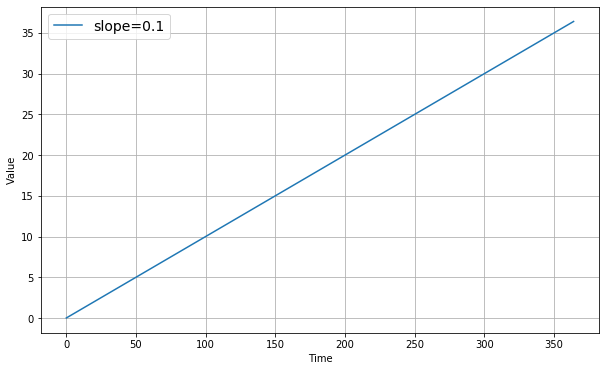

In [5]:
time = np.arange(365)
slope = 0.1
series = trend(time, slope)
plot_series(time, series, label = [f'slope={slope}'])

In [6]:
def seasonal_pattern(season_time):
    data_pattern = np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi),
                            1/np.exp(3*season_time))
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    data_pattern = seasonal_pattern(season_time)*amplitude
    return data_pattern

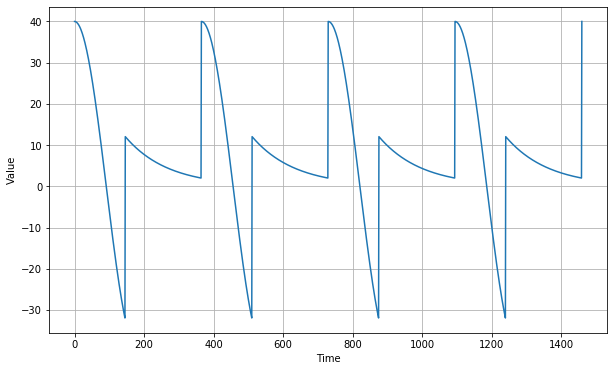

In [7]:
time = np.arange(4*365+1)
period = 365
amplitude = 40
series = seasonality(time, period, amplitude)
plot_series(time, series)

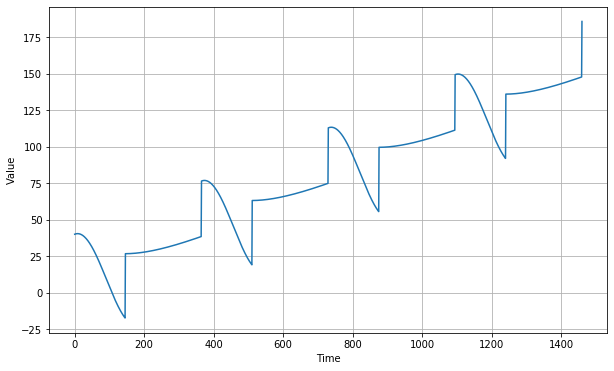

In [8]:
series = trend(time, slope) + seasonality(time, period, amplitude)
plot_series(time, series)

In [9]:
def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    noise = rnd.randn(len(time))*noise_level
    return noise

In [ ]:
noise_level = 5
noise_signal = noise(time, noise_level, seed=42)
plot_series(time, noise_signal)

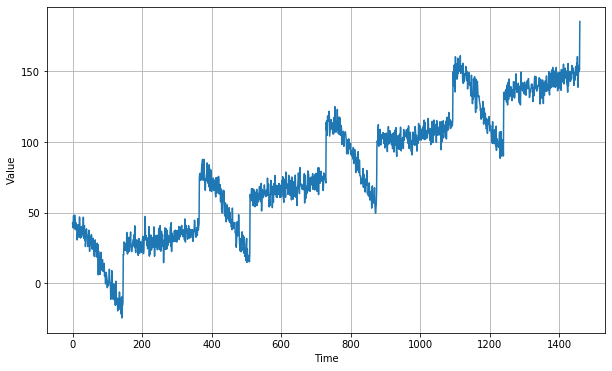

In [11]:
series+=noise_signal
plot_series(time, series)

In [12]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    ar = rnd.randn(len(time)+50)
    ar[:50] = 100
    phi1 = 0.5
    phi2 = -0.1
    for step in range(50, len(time) + 50):
        ar[step] += phi1*ar[step-50]
        ar[step] += phi2 * ar[step-33]
    ar = ar[50:]*amplitude
    return ar

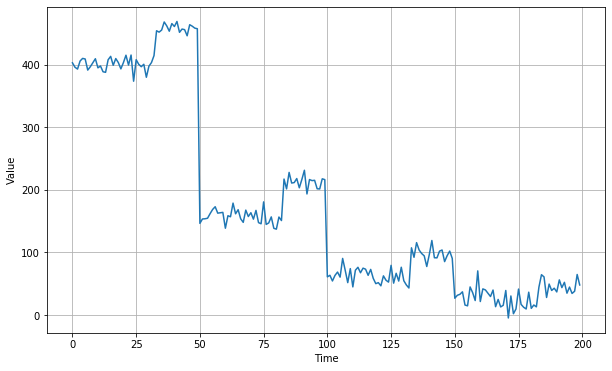

In [13]:
series = autocorrelation(time, amplitude=10, seed=42)
plot_series(time[:200], series[:200])